In [2]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [5]:
df['duration_type'] = df['duration'].apply(lambda x: 'Season' if 'Season' in str(x) else 'Minutes')
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [7]:
df = df.copy() 
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [ ]:
## 1:- Content Strategy 

In [ ]:
## Q1 :- What is the ratio of movies vs TV shows on Netflix?

Content Type Counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Content Type Percentages:
 type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


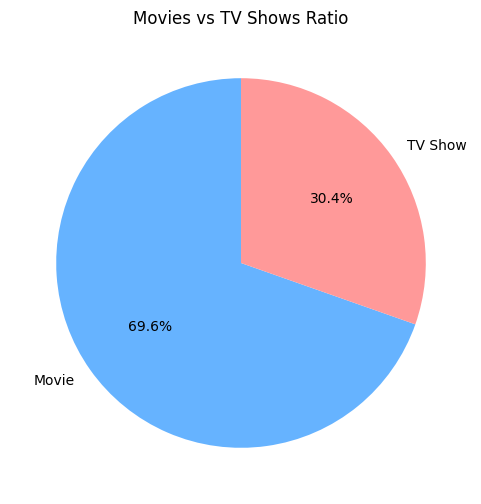

In [9]:
type_counts = df['type'].value_counts()
type_percent = df['type'].value_counts(normalize=True) * 100

print("Content Type Counts:\n", type_counts)
print("\nContent Type Percentages:\n", type_percent)

type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'], figsize=(6,6))
plt.title('Movies vs TV Shows Ratio')
plt.ylabel('')
plt.show()


In [ ]:
##Q2:- Which genres are most popular on Netflix globally?

Top Genres:
 listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


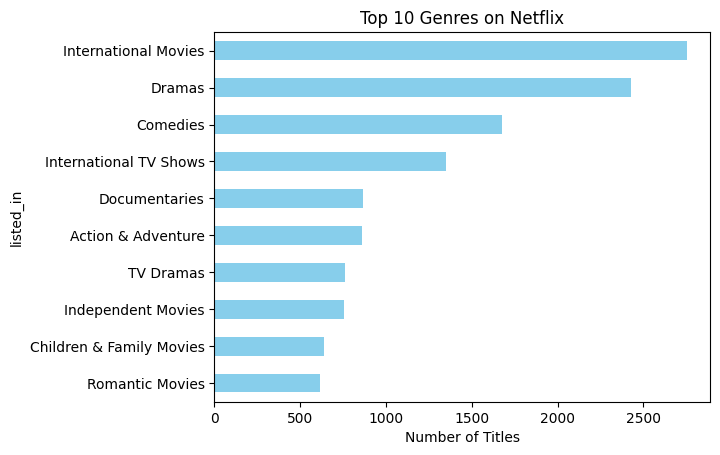

In [10]:

genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(10)

print("Top Genres:\n", top_genres)

top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
##Q3:- Which years saw the highest release of content on Netflix ?

In [5]:
release_years = df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce').dt.year
year_counts = df['release_year'].value_counts().sort_index()

year_counts.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Content Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

NameError: name 'pd' is not defined

In [ ]:
#Q4:- Which Countries Produce the most Netflix content ?

Top Countries:
 country
United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


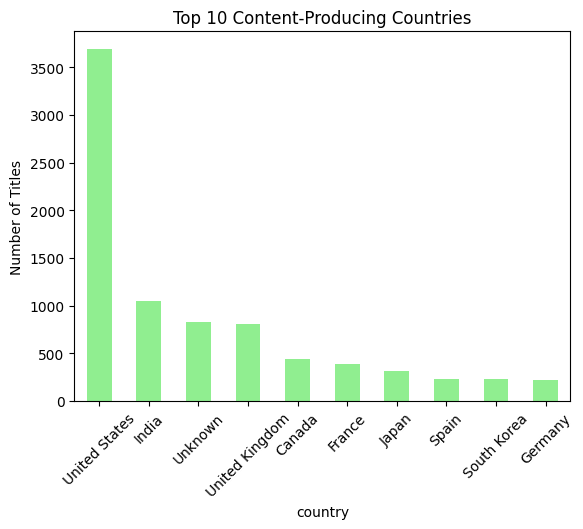

In [12]:
country_series = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = country_series.value_counts().head(10)

print("Top Countries:\n", top_countries)

top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Content-Producing Countries')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Q5:-How has the trend of adding new content evolved year by year?

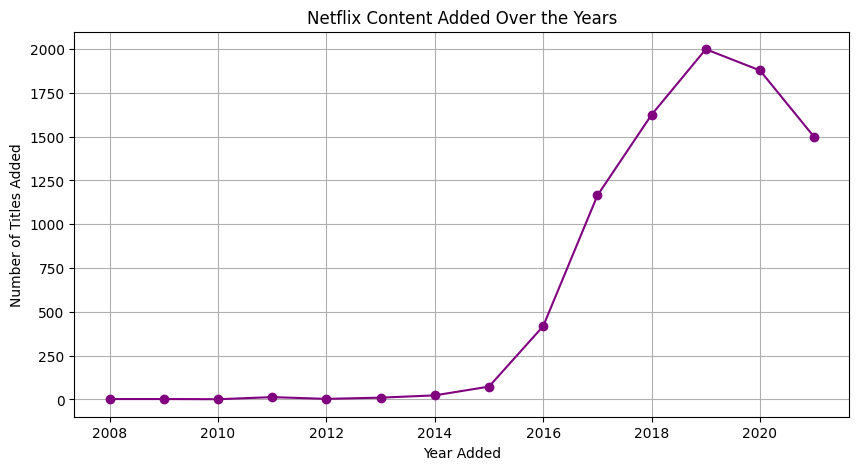

In [13]:
year_added_counts = df['year_added'].value_counts().sort_index()

year_added_counts.plot(kind='line', marker='o', color='purple', figsize=(10,5))
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

In [ ]:
##6:-6.Which ra􀆟ngs (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

Top Ratings:
 rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


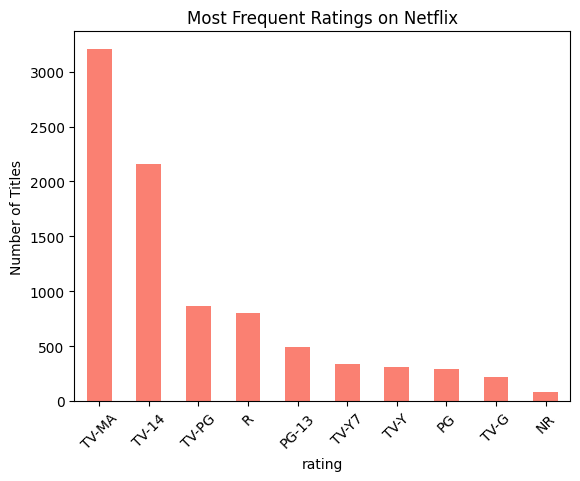

In [14]:
rating_counts = df['rating'].value_counts().head(10)

print("Top Ratings:\n", rating_counts)

rating_counts.plot(kind='bar', color='salmon')
plt.title('Most Frequent Ratings on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Q7:-Do some countries tend to produce more mature content (TV-MA)?

Top TV-MA Producing Countries:
 country
United States     1101
Unknown            276
India              266
United Kingdom     253
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Name: count, dtype: int64


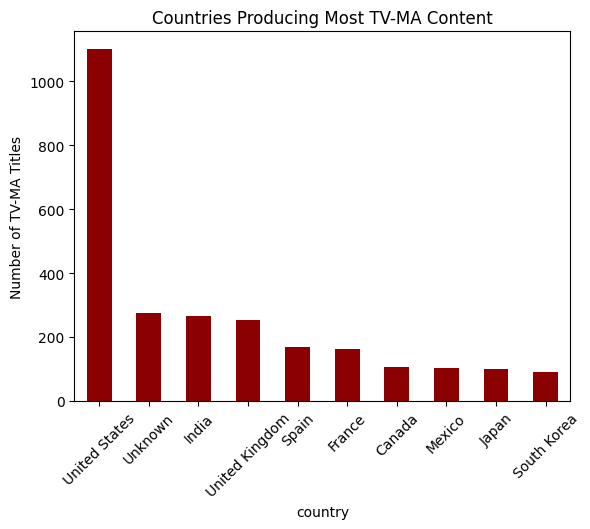

In [15]:
tvma_df = df[df['rating'] == 'TV-MA']
tvma_countries = tvma_df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

print("Top TV-MA Producing Countries:\n", tvma_countries)

tvma_countries.plot(kind='bar', color='darkred')
plt.title('Countries Producing Most TV-MA Content')
plt.ylabel('Number of TV-MA Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Q8:-Which genres are more associated with TV shows .

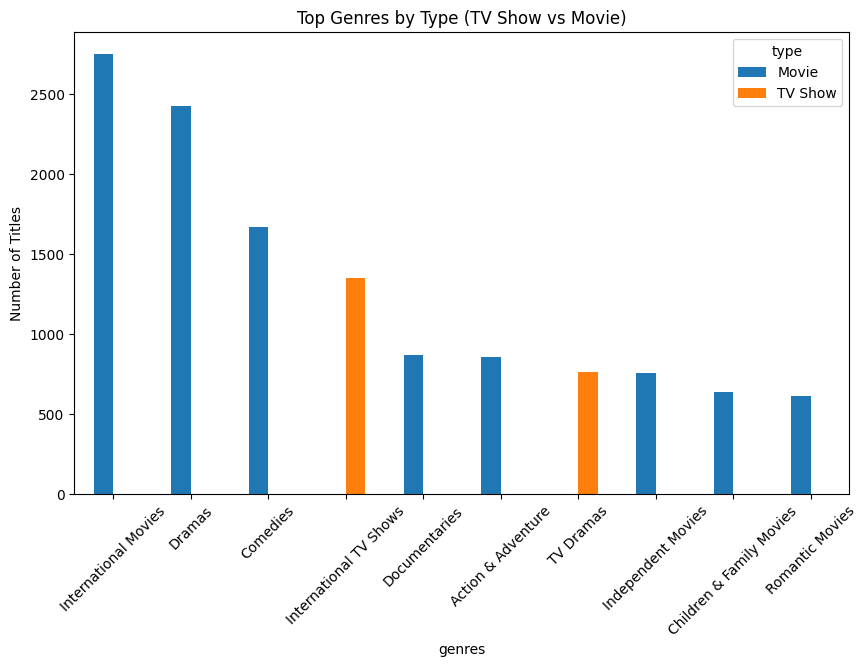

In [16]:
genre_split = df[['type', 'listed_in']].dropna()
genre_split = genre_split.assign(genres=genre_split['listed_in'].str.split(',')).explode('genres')
genre_split['genres'] = genre_split['genres'].str.strip()

genre_pivot = genre_split.groupby(['type', 'genres']).size().unstack(fill_value=0)
genre_pivot = genre_pivot.loc[:, genre_pivot.sum().sort_values(ascending=False).head(10).index]

genre_pivot.T.plot(kind='bar', figsize=(10,6))
plt.title('Top Genres by Type (TV Show vs Movie)')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#9:-Which genres dominate the U.S. vs other countries?

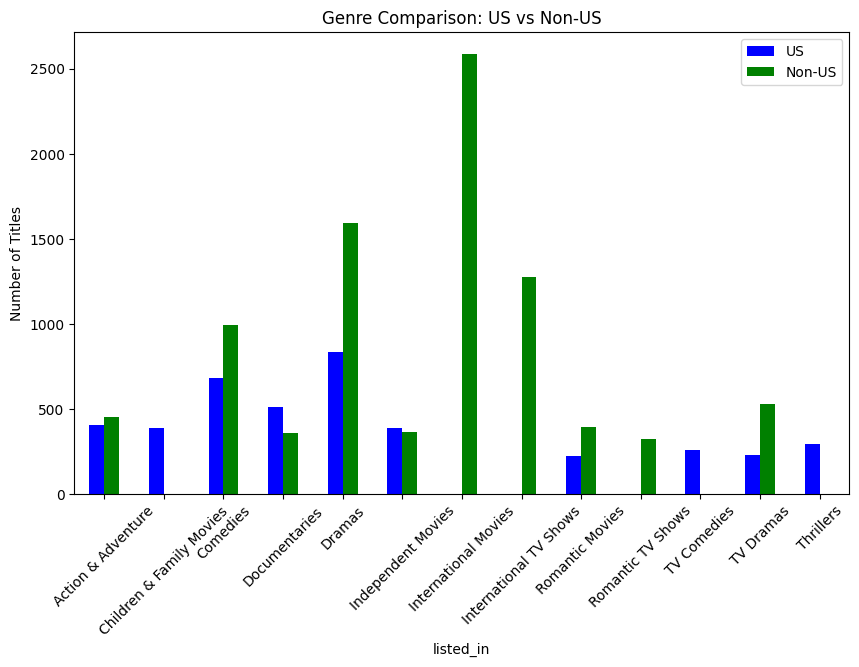

In [17]:
us_df = df[df['country'].str.contains('United States', na=False)]
non_us_df = df[~df['country'].str.contains('United States', na=False)]

us_genres = us_df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
non_us_genres = non_us_df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

# Combine for comparison
genre_compare = pd.DataFrame({'US': us_genres, 'Non-US': non_us_genres}).fillna(0)

genre_compare.plot(kind='bar', figsize=(10,6), color=['blue', 'green'])
plt.title('Genre Comparison: US vs Non-US')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#10:-What genres are most popular in the last 3 years?

Top Genres (Last 3 Years):
 listed_in
International Movies        1593
Dramas                      1511
Comedies                    1135
International TV Shows       836
Action & Adventure           568
TV Dramas                    463
Children & Family Movies     439
Independent Movies           438
Romantic Movies              437
Documentaries                405
Name: count, dtype: int64


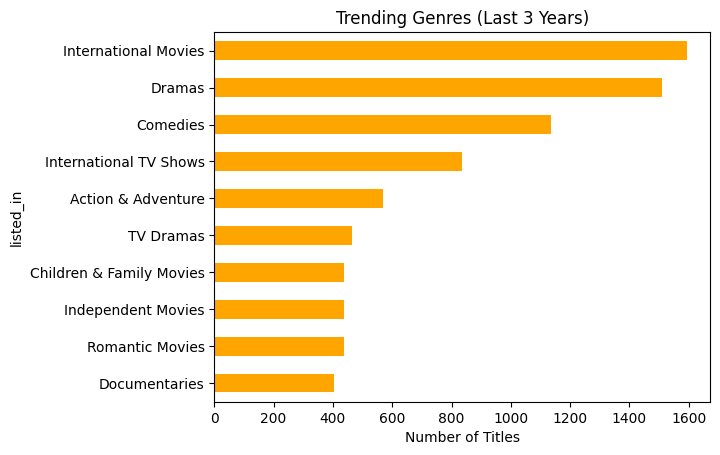

In [18]:
recent_df = df[df['year_added'] >= (df['year_added'].max() - 2)]
recent_genres = recent_df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

print("Top Genres (Last 3 Years):\n", recent_genres)

recent_genres.plot(kind='barh', color='orange')
plt.title('Trending Genres (Last 3 Years)')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#11:-Who are the top 10 directors with the most Netflix content?

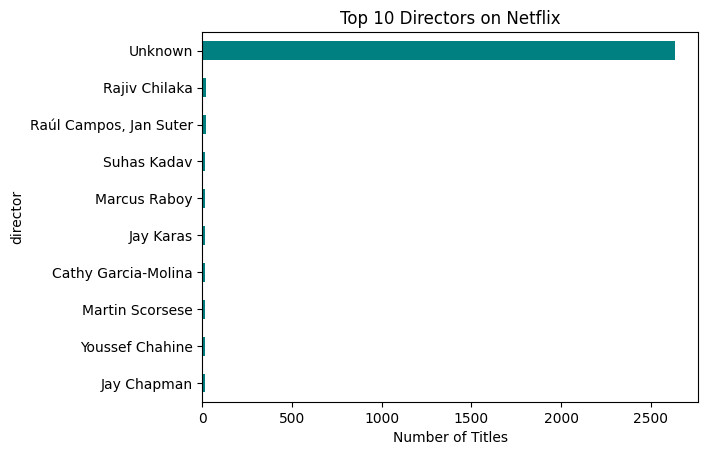

In [19]:
top_directors = df['director'].dropna().value_counts().head(10)
top_directors.plot(kind='barh', color='teal')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#12:-Which actors appear most frequently in Netflix shows?

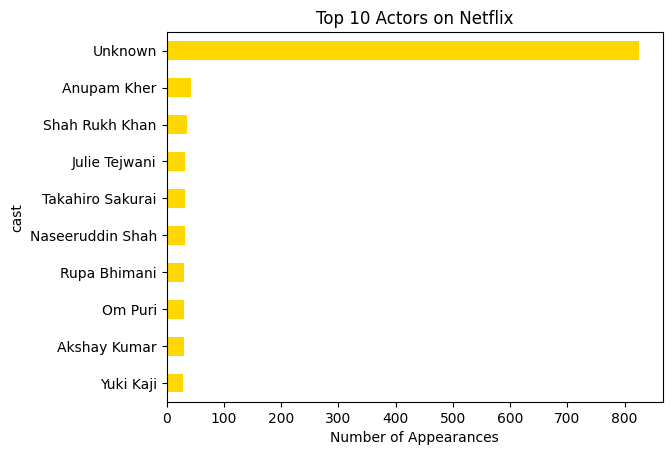

In [20]:
actor_series = df['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actor_series.value_counts().head(10)
top_actors.plot(kind='barh', color='gold')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#13:-Which director-genre pairs are most frequent?

In [21]:
director_genre = df[['director', 'listed_in']].dropna()
director_genre = director_genre.assign(genres=director_genre['listed_in'].str.split(',')).explode('genres')
director_genre['genres'] = director_genre['genres'].str.strip()
pair_counts = director_genre.groupby(['director', 'genres']).size().sort_values(ascending=False).head(10)
print(pair_counts)

director  genres                
Unknown   International TV Shows    1223
          TV Dramas                  702
          TV Comedies                539
          Kids' TV                   433
          Crime TV Shows             401
          Romantic TV Shows          341
          Docuseries                 335
          Reality TV                 249
          British TV Shows           228
          Anime Series               165
dtype: int64


In [ ]:
#14:-How many Titles have unknown directors or cast members?

In [22]:
unknown_directors = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()
print(f"Titles with Unknown Director: {unknown_directors}")
print(f"Titles with Unknown Cast: {unknown_cast}")

Titles with Unknown Director: 0
Titles with Unknown Cast: 0


In [ ]:
##15:-What is the average duraton of Movies on Netflix?

In [23]:
avg_duration = df[df['type'] == 'Movie']['duration_value'].mean()
print(f"Average Movie Duration: {avg_duration:.2f} minutes")

Average Movie Duration: 99.58 minutes


In [ ]:
##16:-What’s the most common number for seasons for TV shows?

In [24]:
season_counts = df[df['type'] == 'TV Show']['duration_value'].value_counts().head(1)
print("Most Common Season Count:\n", season_counts)

Most Common Season Count:
 duration_value
1.0    1793
Name: count, dtype: int64


In [ ]:
#17:-Is there a trend in movie durations over the years?

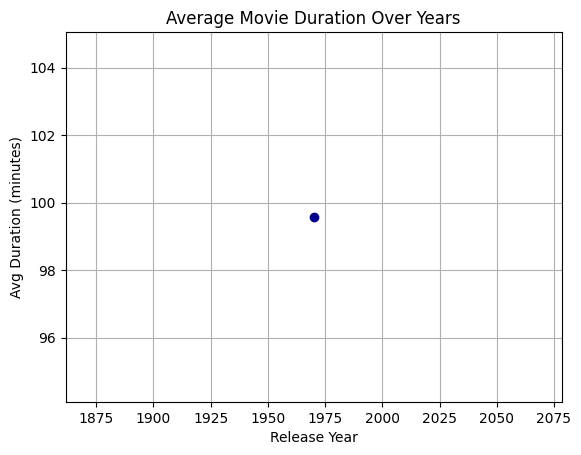

In [25]:
movie_df = df[df['type'] == 'Movie']
duration_trend = movie_df.groupby('release_year')['duration_value'].mean()

duration_trend.plot(kind='line', marker='o', color='darkblue')
plt.title('Average Movie Duration Over Years')
plt.xlabel('Release Year')
plt.ylabel('Avg Duration (minutes)')
plt.grid(True)
plt.show()

In [ ]:
#18:-In which months does Netflix add the most content?

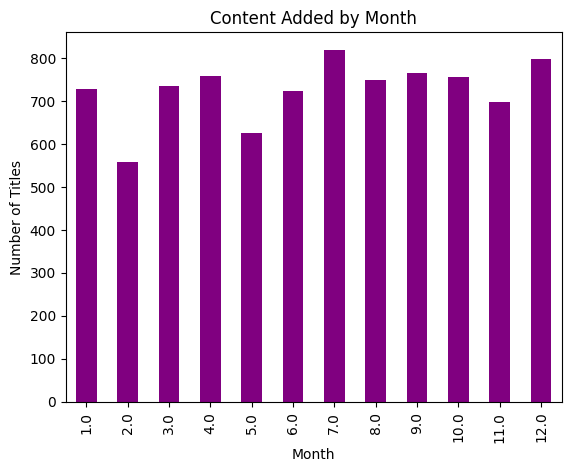

In [26]:
month_counts = df['month_added'].value_counts().sort_index()
month_counts.plot(kind='bar', color='purple')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
#19:-How does the genre distribution vary across different years?

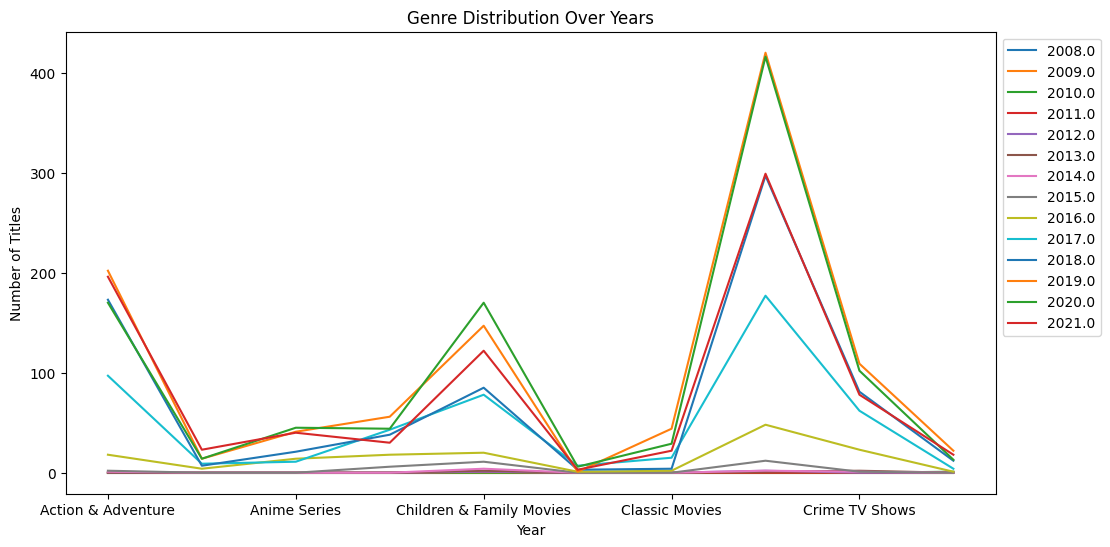

In [27]:
genre_year = df[['year_added', 'listed_in']].dropna()
genre_year = genre_year.assign(genres=genre_year['listed_in'].str.split(',')).explode('genres')
genre_year['genres'] = genre_year['genres'].str.strip()

genre_trend = genre_year.groupby(['year_added', 'genres']).size().unstack(fill_value=0)
genre_trend.T.head(10).plot(figsize=(12,6))
plt.title('Genre Distribution Over Years')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#20:-Which countries produce the most content in each genre?

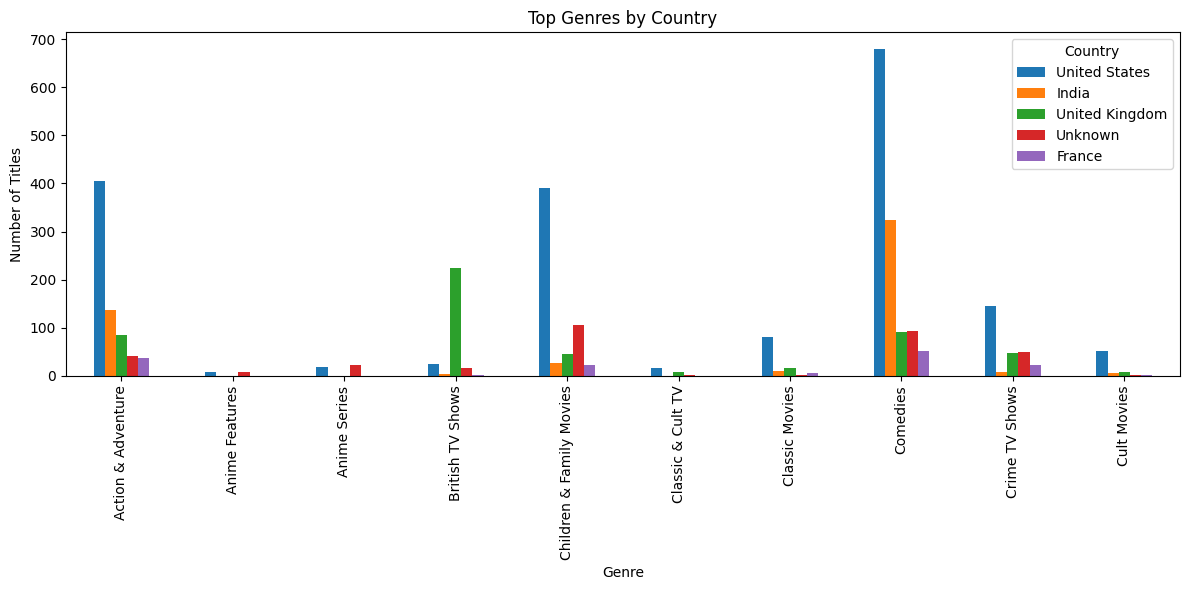

In [29]:

country_genre = df[['country', 'listed_in']].dropna()
country_genre = country_genre.assign(genres=country_genre['listed_in'].str.split(',')).explode('genres')
country_genre['genres'] = country_genre['genres'].str.strip()
country_genre = country_genre.assign(country_split=country_genre['country'].str.split(','))
country_genre = country_genre.explode('country_split')
country_genre['country_split'] = country_genre['country_split'].str.strip()
matrix = country_genre.groupby(['country_split', 'genres']).size().unstack(fill_value=0)
top_countries = country_genre['country_split'].value_counts().head(5).index
matrix.loc[top_countries].T.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top Genres by Country')
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.legend(title='Country', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()